Mount Google drive to Read Files

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir("/content/drive/My Drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


### Method to calcualte spearman's Correlation Coefficient

In [0]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])



### Import all necessary libraries

In [3]:
import numpy as np
import pandas as pd
from string import punctuation
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools 
import io

from tensorflow.python.keras import Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras import optimizers

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

Using TensorFlow backend.


## Aesthetics Mean  - MLP, Random Forest

Read the CSV from PC - clean the data i.e remove columns to convert into numpy array

In [4]:
from google.colab import files
uploaded = files.upload()

Saving aes_mean.csv to aes_mean (3).csv


In [0]:
aes_mean_df = pd.read_csv(io.BytesIO(uploaded['aes_mean.csv']), encoding = "ISO-8859-1")

### Feature Scaling and cleaning for Aesthetics

In [0]:
aes_scaled_df.head()

In [0]:
from sklearn import preprocessing

scaled_features = aes_mean_df.iloc[:, 1:]
column_name = scaled_features.columns
x = aes_mean_df.iloc[:, 1:].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
aes_scaled_df = pd.DataFrame(x_scaled, columns=scaled_features.columns)


In [0]:
aes_scaled_df['video_name'] = aes_mean_df[['name']]

In [0]:
cols = aes_scaled_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
aes_scaled_df = aes_scaled_df[cols]

In [0]:
aes_array = aes_scaled_df.iloc[:, 1: ].values

In [0]:
aes_scaled_df.tail()

In [0]:
print(aes_array.shape, one_hot_res.shape, aes_cap.shape, one_hot_senti.shape, aes_cap_nosenti.shape)

(6000, 109) (6000, 4346) (6000, 4456) (6000, 4347) (6000, 4455)


Read the labels- long-term and short-term scores for the dependant variable

In [0]:
label_path = './Assignment/Dev-set/Ground-truth/'
labels=pd.read_csv(label_path+'ground-truth.csv')

In [0]:
X = aes_array

In [0]:
Y = labels[['short-term_memorability','long-term_memorability']].values

In [0]:
labels.head()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

### MultiLayer Perceptron For Aesthetic

In [21]:
model = Sequential()
# best - 50,27.2
model.add(layers.Dense(50,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(27,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.Dense(30,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(2,activation='relu'))

# compile the model 
model.compile(optimizer='adamax',loss='mse',metrics=['accuracy'])
# training the model 
history = model.fit(X_train, Y_train, epochs=50)

# load the saved model
# evaluate the model
# visualizing the model
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)


Epoch 1/50
150/150 [==============================] - 0s 1ms/step - loss: 0.1300 - accuracy: 0.5958
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.6540
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.6742
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 0.0641 - accuracy: 0.6825
Epoch 5/50
150/150 [==============================] - 0s 1ms/step - loss: 0.0597 - accuracy: 0.6873
Epoch 6/50
150/150 [==============================] - 0s 976us/step - loss: 0.0560 - accuracy: 0.6935
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.6983
Epoch 8/50
150/150 [==============================] - 0s 979us/step - loss: 0.0498 - accuracy: 0.7002
Epoch 9/50
150/150 [==============================] - 0s 988us/step - loss: 0.0471 - accuracy: 0.7033
Epoch 10/50
150/150 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 

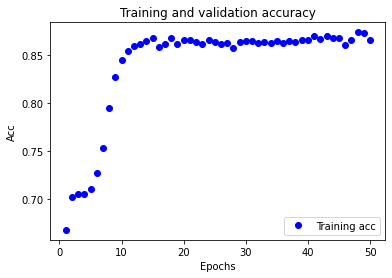

KeyError: ignored

In [118]:
plt.figure()
acc = history.history['accuracy']
#val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The Spearman's correlation coefficient is: 0.248
The Spearman's correlation coefficient is: 0.122

In [22]:

predictions = model.predict(X_test)
Get_score(predictions, Y_test) 

The Spearman's correlation coefficient is: 0.248
The Spearman's correlation coefficient is: 0.122


###  Aesthetics Random Forest Model - Training seperately for long term and short term scores

A grid search is ran to find the best hyper parameters for both short term and long-term memorability task and a random forest regression is performed

In [0]:
X = aes_array
#Y = labels[['short-term_memorability']].values
Y = labels[['short-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [0]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4800, 4348) (1200, 4348) (4800, 1) (1200, 1)


In [0]:
param_grid = {
    'bootstrap': [True],
    'max_features': [4, 6, 8],
    'min_samples_leaf': [ 4, 6, 8],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [500, 600, 700, 800]
}

In [0]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)


In [0]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 500}

Aesthetics score for short term memorability - 0.321

In [16]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=500, max_features= 8, min_samples_leaf = 4, min_samples_split= 8)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
Get_score(y_pred, Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The Spearman's correlation coefficient is: 0.318


In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred) 

0.005532972004171845

In [0]:
X = aes_array
Y = labels[['long-term_memorability']].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

Aesthetics - long term memorability score is 0.148

In [19]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=2000, max_features= 5, min_samples_leaf = 3, min_samples_split= 5)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
Get_score(y_pred, Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The Spearman's correlation coefficient is: 0.144


In [20]:
mean_squared_error(Y_test, y_pred) 

0.02133287602399088

### Aesthetics with - XGBoost 

In [0]:
from xgboost import XGBRegressor

XGBModel = XGBRegressor(objective ='reg:squarederror',         
                 learning_rate=0.1,
                 max_depth= 5,
                 n_estimators=1000)

XGBModel.fit(X_train, Y_train , verbose=False)

XGBpredictions = XGBModel.predict(X_test)
Get_score(XGBpredictions, Y_test)

The Spearman's correlation coefficient is: 0.174


### Local Binary Pattern

### To load features from drive and save it as CSV in my local drive

In [0]:
''' Method to read HMP'''
def read_LBP(fpath, fname, LBP_map):
  with open(fpath) as f:
    value_list = []
    for line in f:
      pairs=line.split(' ')
      for value in pairs:
        value_list.append(value)
    LBP_map[fname] = value_list

In [0]:
video_list = []
for i in range(1, 7494):
  name = 'video' + str(i)
  filename = name + '-56.txt'
  file_path = './Assignment/Dev-set/LBP/' + filename
  if(os.path.exists(file_path)):
    video_list.append(name)

In [0]:
len(video_list)

6000

In [0]:
LBP_map = {}
#hmp_arr = np.empty((0,6075), float)
# load the captions
for filename in video_list:
  filename = filename + '-56.txt'
  file_path = './Assignment/Dev-set/LBP/' + filename
  read_LBP(file_path, filename, LBP_map)

In [0]:
LBP_df = pd.DataFrame.from_dict(LBP_map,  orient='index')

In [0]:
LBP_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121
0,0.01051071,0.00238281,0.00180411,0.00146991,0.00201582,0.00129726,0.00113715,0.00120033,0.00102575,0.00160397,0.00143663,0.00106192,0.00098042,0.00113088,0.00102816,0.00104408,0.00095390,0.00101273,0.00101611,0.00096402,0.00123119,0.00109471,0.00086709,0.00102286,0.00101514,0.00096740,0.00097367,0.00089988,0.00090278,0.00095390,0.00107591,0.00097849,0.00106530,0.00116609,0.00117284,0.00120563,0.00113956,0.00124904,0.00127749,0.00124035,...,0.00152585,0.00168547,0.00132186,0.00190731,0.00131173,0.00170910,0.00156539,0.00138310,0.00177324,0.00170573,0.00143760,0.00158613,0.00179012,0.00184317,0.00183738,0.00265384,0.00191840,0.00165799,0.00194396,0.00253617,0.00194252,0.00229649,0.00226997,0.00298032,0.00263503,0.00293451,0.00548032,0.00467737,0.00420862,0.00448158,0.00403453,0.00712770,0.00781395,0.00612558,0.00747251,0.00762346,0.00648245,0.00406780,0.14867814,0.53409915
1,0.01016445,0.00291377,0.00232832,0.00204524,0.00215471,0.00199990,0.00193287,0.00206115,0.00183401,0.00176215,0.00149064,0.00133247,0.00122926,0.00126640,0.00123119,0.00126495,0.00122444,0.00125193,0.00128858,0.00127218,0.00136671,0.00139178,0.00139226,0.00143181,0.00140673,0.00140818,0.00140143,0.00142072,0.00148582,0.00148775,0.00156491,0.00150608,0.00158324,0.00164062,0.00172261,0.00178578,0.00190201,0.00194541,0.00212963,0.00222656,...,0.00246576,0.00247733,0.00214265,0.00243248,0.00213301,0.00213349,0.00205440,0.00198544,0.00204909,0.00188561,0.00182726,0.00191937,0.00190008,0.00191069,0.00187452,0.00202353,0.00183690,0.00183546,0.00195843,0.00185812,0.00168403,0.00172936,0.00172020,0.00172164,0.00174817,0.00179929,0.00202884,0.00203125,0.00200087,0.00214747,0.00196277,0.00233989,0.00224585,0.00211564,0.00243634,0.00275752,0.00248505,0.00143856,0.02038484,0.44643181
2,0.00749759,0.00117043,0.00096595,0.00072579,0.00120081,0.00070795,0.00074556,0.00086034,0.00076437,0.00124084,0.00113185,0.00075183,0.00066069,0.00067612,0.00057340,0.00073110,0.00057195,0.00058980,0.00058497,0.00057677,0.00116368,0.00105710,0.00071373,0.00098428,0.00097946,0.00080681,0.00088783,0.00090905,0.00078993,0.00088590,0.00105035,0.00087529,0.00104601,0.00120419,0.00115934,0.00119936,0.00118345,0.00138166,0.00152247,0.00140046,...,0.00293692,0.00318335,0.00231723,0.00329331,0.00231674,0.00273052,0.00251157,0.00181665,0.00233410,0.00258054,0.00178819,0.00217689,0.00228781,0.00253858,0.00239487,0.00324267,0.00231047,0.00187741,0.00253376,0.00293499,0.00208430,0.00268711,0.00217785,0.00330150,0.00262587,0.00272714,0.00410639,0.00351273,0.00305266,0.00348235,0.00249662,0.00407986,0.00383632,0.00373939,0.00494358,0.00458478,0.00331260,0.00204427,0.13134211,0.48047647
3,0.01338397,0.00459394,0.00335214,0.00266011,0.00246287,0.00210407,0.00187982,0.00178675,0.00173852,0.00149402,0.00114969,0.00090181,0.00069541,0.00068625,0.00054253,0.00054977,0.00043596,0.00041136,0.00036892,0.00036024,0.00073110,0.00058642,0.00026476,0.00042197,0.00041763,0.00027826,0.00025174,0.00026379,0.00023823,0.00021991,0.00030141,0.00027874,0.00034336,0.00037230,0.00035012,0.00036989,0.00032407,0.00037857,0.00039159,0.00037133,...,0.00095486,0.00119743,0.00085696,0.00167728,0.00089940,0.00164255,0.00110725,0.00101659,0.00126591,0.00158999,0.00094666,0.00127170,0.00154948,0.00176408,0.00159626,0.00257234,0.00150559,0.00125965,0.00160012,0.00249180,0.00159770,0.00196663,0.00203897,0.00314911,0.00239776,0.00258198,0.00378617,0.00338976,0.00344088,0.00431424,0.00384018,0.00602527,0.00576437,0.00666329,0.01064863,0.00996721,0.00863812,0.00508295,0.17544898,0.60352189
4,0.02373216,0.00531973,0.00533999,0.00461806,0.00399643,0.00348428,0.00309028,0.00296682,0.00278791,0.00264709,0.00274691,0.00263648,0.00258584,0.00253713,0.00242139,0.00234423,0.00225887,0.00210503

In [0]:
column_list = []
for i in range(1, 123):
  cname = 'lbp' + str(i)
  column_list.append(cname)

LBP_df.columns = column_list

In [0]:
LBP_df.reset_index(inplace=True)

In [0]:
LBP_df.drop(columns=['index'], inplace = True)

In [0]:
LBP_df = LBP_df.iloc[:, : -1]

In [0]:
LBP_df.to_csv('/content/drive/My Drive/LBP_df.csv')

### Testing with LBP features

In [0]:
LBP_df = pd.read_csv('LBP.csv')

In [0]:
LBP_df = LBP_df.iloc[: , 2:]
LBP_df.head()

In [0]:
LBP_df = LBP_df.astype(np.float64)

In [0]:
LBP_df.info()

In [0]:
aes_lbp = np.concatenate((aes_array, LBP_df.values), axis=1)
lbp_hmp = np.concatenate((hmp_array, LBP_df.values), axis=1)
lbp_one_hot_res = np.concatenate((one_hot_res, LBP_df.values), axis=1)

In [0]:
X = lbp_hmp
#Y = labels[['short-term_memorability','long-term_memorability']].values
Y = labels[['long-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4800, 231) (1200, 231) (4800, 1) (1200, 1)


In [43]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=1000, max_features= 8, min_samples_leaf = 4, min_samples_split= 8)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
Get_score(y_pred, Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The Spearman's correlation coefficient is: 0.125


In [0]:
model = Sequential()
# best - 50,27.2
model.add(layers.Dense(50,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(27,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.Dense(30,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(2,activation='relu'))

# compile the model 
model.compile(optimizer='adamax',loss='mse',metrics=['accuracy'])

# training the model 
history = model.fit(X_train, Y_train, epochs=20)

# visualizing the model
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)
model.summary()

In [0]:
y_pred = model.predict(X_test)
Get_score(y_pred, Y_test)

The Spearman's correlation coefficient is: 0.241
The Spearman's correlation coefficient is: 0.122


### COLOR HISTOGRAM - Reading the middle layer of each file
 Reading data from cloud file and storing it in a dataframe



In [0]:
''' Method to read HMP'''
def read_CH(fpath, fname, CH_map):
    with open(fpath) as f:
      for line in f:
        pairs=line.split()
        CH_temp = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
    # there are 6075 bins, fill zeros
    CH = np.zeros(256)
    for idx in CH_temp.keys():
        CH[idx-1] = CH_temp[idx]            
    return CH

In [0]:
video_listch = []
for i in range(1, 7494):
  name = 'video' + str(i)
  filename = name + '-56.txt'
  file_path = './Assignment/Dev-set/ColorHistogram/' + filename
  if(os.path.exists(file_path)):
    video_listch.append(name)

In [0]:
len(video_listch)

6000

In [0]:
CH_map = {}
CH_arr = np.empty((0,256), float)

for filename in video_list:
  filename = filename + '-56.txt'
  file_path = './Assignment/Dev-set/ColorHistogram/' + filename
  CH = read_CH(file_path, filename, CH_map)
  CH_arr = np.vstack([CH_arr, CH])


In [0]:
column_list = []
for i in range(1, 257):
  cname = 'CH' + str(i)
  column_list.append(cname)

In [0]:
ch_df = pd.DataFrame(CH_arr, columns=column_list)


In [0]:
ch_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,CH11,CH12,CH13,CH14,CH15,CH16,CH17,CH18,CH19,CH20,CH21,CH22,CH23,CH24,CH25,CH26,CH27,CH28,CH29,CH30,CH31,CH32,CH33,CH34,CH35,CH36,CH37,CH38,CH39,CH40,...,CH217,CH218,CH219,CH220,CH221,CH222,CH223,CH224,CH225,CH226,CH227,CH228,CH229,CH230,CH231,CH232,CH233,CH234,CH235,CH236,CH237,CH238,CH239,CH240,CH241,CH242,CH243,CH244,CH245,CH246,CH247,CH248,CH249,CH250,CH251,CH252,CH253,CH254,CH255,CH256
0,3.0,285.0,331.0,66131.0,61148.0,231869.0,49885.0,14711.0,96686.0,8920.0,14507.0,19699.0,9596.0,9686.0,16456.0,20635.0,8540.0,33913.0,8448.0,17803.0,22303.0,25465.0,14213.0,107114.0,111482.0,45762.0,22372.0,64597.0,57173.0,18299.0,28792.0,14359.0,8669.0,6060.0,9581.0,6617.0,7335.0,7058.0,6161.0,6290.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1,8553.0,3664.0,3099.0,3054.0,2642.0,2833.0,2355.0,2389.0,2419.0,2164.0,2613.0,2698.0,2867.0,2926.0,2578.0,3165.0,2417.0,2965.0,3425.0,3166.0,2991.0,3264.0,3979.0,3725.0,3733.0,3797.0,3670.0,3639.0,4045.0,4733.0,4040.0,3903.0,3905.0,4519.0,3702.0,4937.0,5229.0,6037.0,4305.0,4329.0,...,1762.0,1834.0,1086.0,1658.0,2204.0,2297.0,2446.0,1707.0,1663.0,791.0,1459.0,1461.0,1415.0,1401.0,1343.0,1228.0,482.0,991.0,1263.0,1491.0,2061.0,1305.0,979.0,462.0,1205.0,1499.0,1476.0,2647.0,1579.0,1294.0,464.0,1190.0,1890.0,1607.0,3050.0,1850.0,4213.0,511.0,9524.0,31480.0
2,5696.0,91903.0,80186.0,37287.0,44852.0,36775.0,41904.0,27869.0,25416.0,22236.0,18316.0,39323.0,15505.0,26902.0,41416.0,30495.0,19845.0,22148.0,20832.0,21224.0,14633.0,25283.0,18046.0,16818.0,15979.0,12069.0,23046.0,13225.0,18161.0,21911.0,17493.0,17426.0,12047.0,18392.0,15011.0,23790.0,17894.0,39308.0,25596.0,16867.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,447.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,74.0,17.0,266.0,127.0,377.0,390.0,403.0,401.0,379.0,333.0,297.0,341.0,310.0,332.0,360.0,328.0,278.0,259.0,273.0,228.0,252.0,286.0,246.0,336.0,236.0,230.0,270.0,236.0,206.0,208.0,...,1473.0,1268.0,1232.0,1227.0,1380.0,1264.0,1150.0,1416.0,1229.0,1098.0,1184.0,1285.0,1118.0,1180.0,1329.0,1232.0,1133.0,1199.0,1316.0,1185.0,1209.0,1277.0,1252.0,1157.0,1528.0,1581.0,1422.0,1562.0,1657.0,1601.0,1430.0,1964.0,2289.0,2255.0,2751.0,2444.0,3692.0,1093.0,4477.0,0.0
4,9582.0,8560.0,9828.0,8988.0,9273.0,7578.0,7139.0,8469.0,8453.0,7654.0,7368.0,8017.0,6834.0,5747.0,6703.0,5224.0,5810.0,5356.0,5238.0,4777.0,4217.0,5022.0,4101.0,4265.0,3980.0,3679.0,3938.0,3574.0,3687.0,3340.0,3266.0,3356.0,3108.0,3459.0,3312.0,3271.0,3502.0,3398.0,3629.0,3286.0,...,3159.0,3138.0,3264.0,3462.0,3411.0,3674.0,3638.0,3933.0,4019.0,4276.0,4433.0,4498.0,4877.0,5041.0,5160.0,5460.0,5795.0,5969.0,6457.0,6852.0,7245.0,7753.0,8259.0,8563.0,9075.0,9916.0,10800.0,11420.0,12543.0,13381.0,13817.0,16118.0,16545.0,16434.0,19663.0,17034.0,21174.0,17200.0,139598.0,39228.0


In [0]:
ch_df.to_csv('/content/drive/My Drive/ch_df.csv')

### Color Hist - Run Random forest test for short-term and long-term scores

In [0]:
ch_df = pd.read_csv('ch_df.csv')

In [22]:
ch_df = ch_df.iloc[: , 1:]
ch_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,CH11,CH12,CH13,CH14,CH15,CH16,CH17,CH18,CH19,CH20,CH21,CH22,CH23,CH24,CH25,CH26,CH27,CH28,CH29,CH30,CH31,CH32,CH33,CH34,CH35,CH36,CH37,CH38,CH39,CH40,...,CH217,CH218,CH219,CH220,CH221,CH222,CH223,CH224,CH225,CH226,CH227,CH228,CH229,CH230,CH231,CH232,CH233,CH234,CH235,CH236,CH237,CH238,CH239,CH240,CH241,CH242,CH243,CH244,CH245,CH246,CH247,CH248,CH249,CH250,CH251,CH252,CH253,CH254,CH255,CH256
0,3.0,285.0,331.0,66131.0,61148.0,231869.0,49885.0,14711.0,96686.0,8920.0,14507.0,19699.0,9596.0,9686.0,16456.0,20635.0,8540.0,33913.0,8448.0,17803.0,22303.0,25465.0,14213.0,107114.0,111482.0,45762.0,22372.0,64597.0,57173.0,18299.0,28792.0,14359.0,8669.0,6060.0,9581.0,6617.0,7335.0,7058.0,6161.0,6290.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1,8553.0,3664.0,3099.0,3054.0,2642.0,2833.0,2355.0,2389.0,2419.0,2164.0,2613.0,2698.0,2867.0,2926.0,2578.0,3165.0,2417.0,2965.0,3425.0,3166.0,2991.0,3264.0,3979.0,3725.0,3733.0,3797.0,3670.0,3639.0,4045.0,4733.0,4040.0,3903.0,3905.0,4519.0,3702.0,4937.0,5229.0,6037.0,4305.0,4329.0,...,1762.0,1834.0,1086.0,1658.0,2204.0,2297.0,2446.0,1707.0,1663.0,791.0,1459.0,1461.0,1415.0,1401.0,1343.0,1228.0,482.0,991.0,1263.0,1491.0,2061.0,1305.0,979.0,462.0,1205.0,1499.0,1476.0,2647.0,1579.0,1294.0,464.0,1190.0,1890.0,1607.0,3050.0,1850.0,4213.0,511.0,9524.0,31480.0
2,5696.0,91903.0,80186.0,37287.0,44852.0,36775.0,41904.0,27869.0,25416.0,22236.0,18316.0,39323.0,15505.0,26902.0,41416.0,30495.0,19845.0,22148.0,20832.0,21224.0,14633.0,25283.0,18046.0,16818.0,15979.0,12069.0,23046.0,13225.0,18161.0,21911.0,17493.0,17426.0,12047.0,18392.0,15011.0,23790.0,17894.0,39308.0,25596.0,16867.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,447.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,74.0,17.0,266.0,127.0,377.0,390.0,403.0,401.0,379.0,333.0,297.0,341.0,310.0,332.0,360.0,328.0,278.0,259.0,273.0,228.0,252.0,286.0,246.0,336.0,236.0,230.0,270.0,236.0,206.0,208.0,...,1473.0,1268.0,1232.0,1227.0,1380.0,1264.0,1150.0,1416.0,1229.0,1098.0,1184.0,1285.0,1118.0,1180.0,1329.0,1232.0,1133.0,1199.0,1316.0,1185.0,1209.0,1277.0,1252.0,1157.0,1528.0,1581.0,1422.0,1562.0,1657.0,1601.0,1430.0,1964.0,2289.0,2255.0,2751.0,2444.0,3692.0,1093.0,4477.0,0.0
4,9582.0,8560.0,9828.0,8988.0,9273.0,7578.0,7139.0,8469.0,8453.0,7654.0,7368.0,8017.0,6834.0,5747.0,6703.0,5224.0,5810.0,5356.0,5238.0,4777.0,4217.0,5022.0,4101.0,4265.0,3980.0,3679.0,3938.0,3574.0,3687.0,3340.0,3266.0,3356.0,3108.0,3459.0,3312.0,3271.0,3502.0,3398.0,3629.0,3286.0,...,3159.0,3138.0,3264.0,3462.0,3411.0,3674.0,3638.0,3933.0,4019.0,4276.0,4433.0,4498.0,4877.0,5041.0,5160.0,5460.0,5795.0,5969.0,6457.0,6852.0,7245.0,7753.0,8259.0,8563.0,9075.0,9916.0,10800.0,11420.0,12543.0,13381.0,13817.0,16118.0,16545.0,16434.0,19663.0,17034.0,21174.0,17200.0,139598.0,39228.0


In [0]:
ch_array =  ch_df.values

Color Histogram - Short-term score

In [0]:
X = ch_array
#Y = labels[['short-term_memorability','long-term_memorability']].values
Y = labels[['short-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 2000, max_features= 4, min_samples_leaf = 5, min_samples_split= 8)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
Get_score(y_pred, Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The Spearman's correlation coefficient is: 0.211


In [29]:
mean_squared_error(Y_test, y_pred)

0.021584182934185535

Color Histogram Long-term Memorability 

In [0]:
X = ch_array
#Y = labels[['short-term_memorability','long-term_memorability']].values
Y = labels[['long-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 800, max_features= 4, min_samples_leaf = 5, min_samples_split= 8)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
Get_score(y_pred, Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The Spearman's correlation coefficient is: 0.104


### A Test based on Gestalt's Principle - Color Histogram and Aesthetics

Short-term memorability test

In [0]:
color_aes = np.concatenate((ch_array, aes_array), axis=1)

In [0]:
X = color_aes
#Y = labels[['short-term_memorability','long-term_memorability']].values
Y = labels[['short-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 800, max_features= 4, min_samples_leaf = 5, min_samples_split= 8)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
Get_score(y_pred, Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The Spearman's correlation coefficient is: 0.289


In [33]:
mean_squared_error(Y_test, y_pred)

0.005702493495975153

Long - Term memorability Test

In [0]:
X = color_aes
#Y = labels[['short-term_memorability','long-term_memorability']].values
Y = labels[['long-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 800, max_features= 4, min_samples_leaf = 5, min_samples_split= 8)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
Get_score(y_pred, Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The Spearman's correlation coefficient is: 0.139


In [36]:
mean_squared_error(Y_test, y_pred)

0.021331769389618702

## Histogram of Gradient

In [0]:
''' Method to read HOG'''
def read_HOG(fpath, fname, HOG_map):
  with open(fpath) as f:
    value_list = []
    for line in f:
      pairs=line.split(' ')
      for value in pairs:
        value_list.append(value)
    HOG_map[fname] = value_list

In [0]:
video_list = []
for i in range(1, 7494):
  name = 'video' + str(i)
  filename = name + '-56.txt'
  file_path = './Assignment/Dev-set/HOG/' + filename
  if(os.path.exists(file_path)):
    video_list.append(name)

In [0]:
len(video_list)

6000

In [0]:
HOG_map = {}
#hmp_arr = np.empty((0,6075), float)
# load the captions
for filename in video_list:
  filename = filename + '-56.txt'
  file_path = './Assignment/Dev-set/HOG/' + filename
  read_HOG(file_path, filename, HOG_map)

In [0]:
HOG_df = pd.DataFrame.from_dict(HOG_map,  orient='index')

In [0]:
HOG_df.head()

In [0]:
HOG_df.reset_index(inplace=True)
HOG_df.drop(columns=['index'], inplace = True)

In [0]:
HOG_df.to_csv('/content/drive/My Drive/HOG_df.csv')

In [108]:
HOG_df = pd.read_csv('HOG_df.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (971,1863,1951,2121,2494,2495,2506,2561,2564,2580,2835,2840,2848,2892,2903,3005,3042,3044,3086,3108,3149,3151,3161,3167,3182,3234,3260,3278,3293,3305,3383,3396,3400,3417,3438,3450,3467,3469,3477,3481,3535,3549,3552,3567,3585,3650,3655,3663,3675,3691,3736,3749,3765,3815,3863,3900,3934,3937,3943,3950,3959,3970,3977,4004,4029,4031,4056,4059,4075,4106,4115,4152,4170,4177,4186,4190,4203,4236,4247,4264,4269,4280,4291,4294,4308,4315,4369,4371,4374,4399,4403,4415,4447,4451,4453,4457,4466,4471,4473,4474,4479,4496,4501,4509,4524,4529,4530,4532,4540,4549,4566,4569,4576,4608,4626,4628,4630,4645,4650,4651,4652,4655,4679,4684,4689,4702,4705,4713,4714,4726,4728,4730,4738,4746,4748,4749,4755,4759,4761,4767,4769,4786,4792,4796,4799,4808,4809,4813,4817,4821,4824,4829,4833,4834,4837,4843,4846,4853,4856,4868,4870,4876,4880,4910,4912,4930,4931,4946,4948,4950,4960,4966,4969,4970,4978,4981,4983,4986,4987,4991,

In [107]:
HOG_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11676,11677,11678,11679,11680,11681,11682,11683,11684,11685,11686,11687,11688,11689,11690,11691,11692,11693,11694,11695,11696,11697,11698,11699,11700,11701,11702,11703,11704,11705,11706,11707,11708,11709,11710,11711,11712,11713,11714,11715
0,0.172334,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.028002,0.000056,0.000056,0.000056,0.000056,0.000056,0.000112,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000112,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,...,5.612e-05,0.000224,0.000056,0.00016835,0.00022447,0.000224,0.000224,0.00016835,0.00022447,0.000168,0.000056,0.00011223,5.612e-05,0.00022447,0.00011223,5.612e-05,0.00016835,0.000056,5.612e-05,5.612e-05,0.000056,0.00022447,5.612e-05,5.612e-05,0.000337,5.612e-05,0.00016835,0.00028058,0.00016835,0.00016835,5.612e-05,0.000056,0.00011223,5.612e-05,5.612e-05,0.00022447,0.00011223,5.612e-05,5.612e-05,0.00016835
2,0.195286,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000112,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.222054,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000112,0.000056,0.000056,0.000056,0.000168,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000168,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
HOG_df = HOG_df.fillna('0.0')

## C3D 

### Read File from Drive and store it in a dataframe for easy readability

In [0]:
''' Method to read HOG'''
def read_c3d(fpath, fname, c3d_map):
  with open(fpath) as f:
    value_list = []
    for line in f:
      pairs=line.split(' ')
      for value in pairs:
        value_list.append(value)
    c3d_map[fname] = value_list

In [0]:
video_list = []
for i in range(1, 7494):
  name = 'video' + str(i)
  filename = name + '.txt'
  file_path = './Assignment/Dev-set/C3D/' + filename
  if(os.path.exists(file_path)):
    video_list.append(name)

In [0]:
c3d_map = {}
#hmp_arr = np.empty((0,6075), float)
# load the captions
for filename in video_list:
  filename = filename + '.txt'
  file_path = './Assignment/Dev-set/C3D/' + filename
  read_c3d(file_path, filename, c3d_map)

In [0]:
c3d_df = pd.DataFrame.from_dict(c3d_map,  orient='index')

In [0]:
c3d_df.head()

In [0]:
c3d_df.to_csv('/content/drive/My Drive/c3d_df.csv')

### **C3D - Train models for video memorability**

In [0]:
c3d_df = pd.read_csv('c3d_df.csv')

In [0]:
c3d_df = c3d_df.iloc[:, 1:-1]

In [0]:
c3d_df.head()

In [0]:
c3d_arr  = c3d_df.values

In [0]:
lbp_c3d = np.concatenate((c3d_arr, LBP_df.values), axis=1)
color_c3d = np.concatenate((ch_array, c3d_arr), axis=1)
cap_c3d = np.concatenate((one_hot_senti, c3d_arr), axis=1)

Short-term memorability Score

In [0]:
X = c3d_arr
#Y = labels[['short-term_memorability','long-term_memorability']].values
Y = labels[['short-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 2000, max_features= 4, min_samples_leaf = 5, min_samples_split= 8)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
Get_score(y_pred, Y_test)

Long-term memorability score

In [0]:
X = c3d_arr
#Y = labels[['short-term_memorability','long-term_memorability']].values
Y = labels[['long-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 2000, max_features= 4, min_samples_leaf = 5, min_samples_split= 8)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
Get_score(y_pred, Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The Spearman's correlation coefficient is: 0.144


## Histogram of Moving Patterns